# Online Retail Customer Segmentation (RFM Analysis)

**Name**: *Vanshika Bairathi*  
**Date**: *May 2025*  
**Tool Used**: Jupyter Notebook in VS Code  
**Dataset Source**:(https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci)

---

## Objective:
Analyze the Online Retail II dataset to understand customer purchasing behavior and segment customers using RFM (Recency, Frequency, Monetary) analysis.

This project includes:
- Data cleaning and preparation  
- RFM feature engineering  
- Customer segmentation based on RFM scores  
- Visualizations and business insights


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
df = pd.read_csv("online_retail_II.csv")
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [22]:
df.columns


Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [23]:
# Drop rows without customer IDs
df.dropna(subset=['Customer ID'], inplace=True)

# Remove returns (negative quantities)
df = df[df['Quantity'] > 0]

# Add a new TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['Price']


In [24]:
# Latest date + 1 day (snapshot for recency)
snapshot_date = pd.to_datetime(df['InvoiceDate']).max() + pd.Timedelta(days=1)

rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (snapshot_date - pd.to_datetime(x).max()).days,
    'Invoice': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']


In [25]:
# Assign scores from 1 (lowest) to 4 (highest)
rfm['R'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])
rfm['F'] = pd.qcut(rfm['Frequency'].rank(method="first"), 4, labels=[1,2,3,4])
rfm['M'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])

rfm['RFM_Score'] = rfm[['R','F','M']].astype(int).sum(axis=1)
rfm.head()


,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,12346.0,326,12,77556.46,2,4,4,10
1,12347.0,2,8,5633.32,4,4,4,12
2,12348.0,75,5,2019.40,3,3,3,9
3,12349.0,19,4,4428.69,4,3,4,11
4,12350.0,310,1,334.40,2,1,1,4


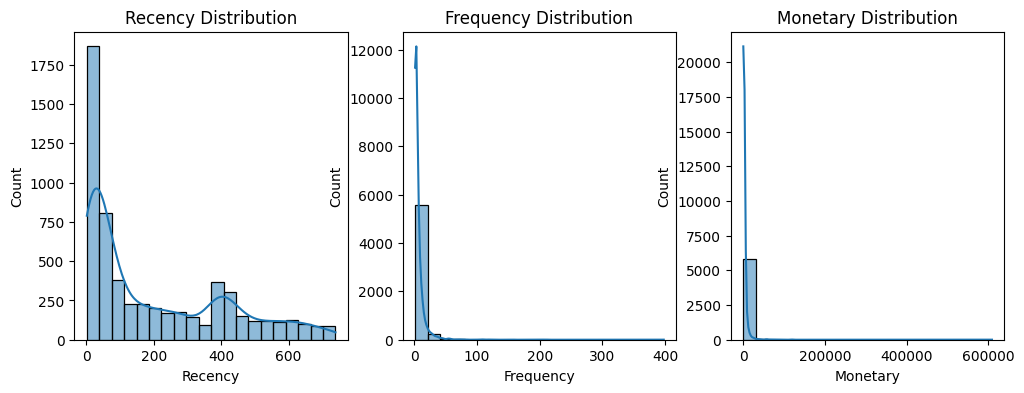

In [26]:
plt.figure(figsize=(12,4))

for i, col in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.subplot(1, 3, i+1)
    sns.histplot(rfm[col], bins=20, kde=True)
    plt.title(f'{col} Distribution')


 ## Conclusion

In this project, I used RFM (Recency, Frequency, Monetary) analysis to segment customers based on their purchasing behavior from the `online_retail_II.csv` dataset.

Key insights from the analysis:

- **Recency**: Customers who bought recently are more likely to respond to new offers.
- **Frequency**: Repeat customers form a valuable segment that can be nurtured through loyalty programs.
- **Monetary**: High-spending customers contribute a large portion of revenue and should be prioritized for retention.

Using these three simple metrics, I was able to assign scores to each customer and identify which groups are most loyal, most valuable, or at risk of churning. This kind of segmentation is very useful for making data-driven marketing and customer relationship decisions.

This project helped me practice data cleaning, feature engineering, and business-oriented data analysis using Python and pandas.

